In [11]:
import os
import numpy as np

all_data = []
directory = "data"

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(os.path.join(directory,filename)) as file:
            data = []
            for line in file:
                data.append(int(line.rstrip()))
            data = np.array(data)
            all_data.append(data)

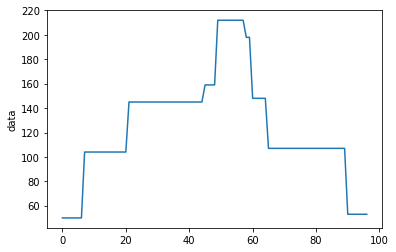

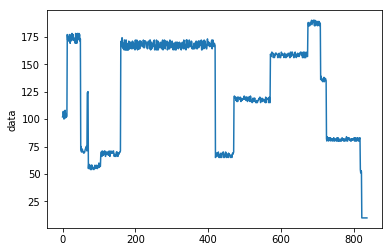

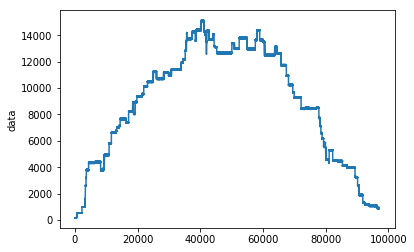

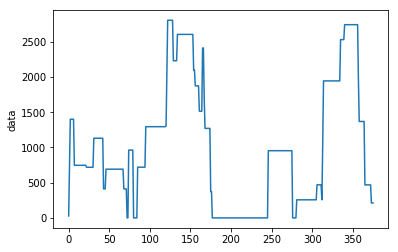

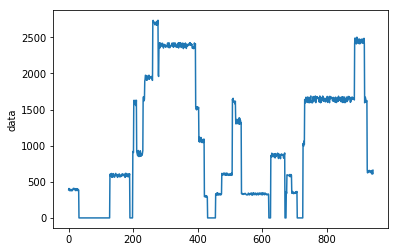

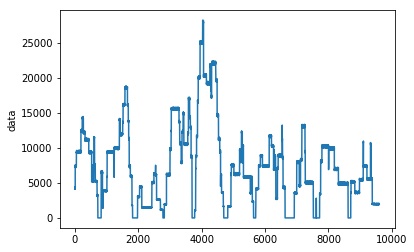

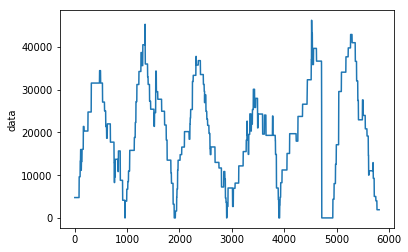

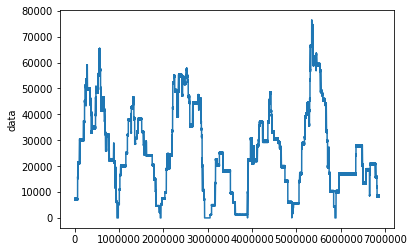

In [13]:
import matplotlib.pyplot as plt

for data in all_data:
    plt.plot(data)
    plt.ylabel('data')
    plt.show()

In [99]:
data = all_data[1]

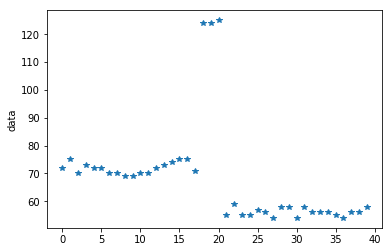

In [117]:
plt.plot(data[50:90],'*')
plt.ylabel('data')
plt.show()

In [144]:
def smoothen(data, margin=1):
    
    signal = np.concatenate(([0]*margin, data, [0]*margin))
    smooth_data = []
    
    for i in range(margin, len(data)+margin):
        
        left_mean = np.mean(signal[i-margin:i])
        
        left_jump = abs( left_mean - signal[i] )
        
        right_mean = np.mean(signal[i+1:i+1+margin])
        
        right_jump = abs( right_mean - signal[i] )
    
        if left_jump < right_jump:
            smooth_data.append(left_mean)
        else:
            smooth_data.append(right_mean)
            
    return smooth_data

In [145]:
smooth_data = smoothen(data)

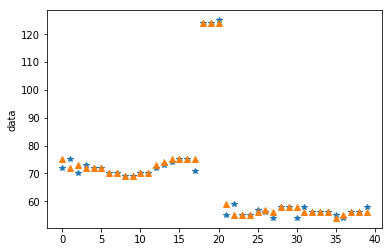

In [146]:
plt.plot(data[50:90],'*')
plt.plot(smooth_data[50:90], "^")
plt.ylabel('data')
plt.show()

In [162]:
1//2

0

In [165]:
def smoothen_n_times(data, n):
    smooth_data = data
    for i in range(n):
        smooth_data = smoothen(smooth_data, margin=i+1)
    return smooth_data

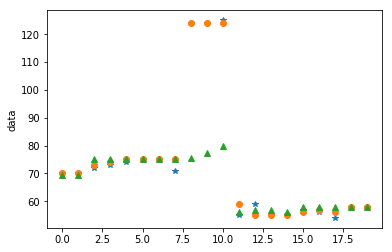

In [166]:
L = 60
R = 80

plt.plot(data[L:R],'*')
plt.plot(smoothen_n_times(data,1)[L:R], "o")
plt.plot(smoothen_n_times(data,10)[L:R], "^")
plt.ylabel('data')
plt.show()